In [26]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dropout, Dense, Activation
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
vocab_size = 10000  
words_limit = 200   
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

Padding the sequences

In [3]:
x_train_seq = pad_sequences(x_train, maxlen=words_limit)
x_test_seq = pad_sequences(x_test, maxlen=words_limit)

print('train shape:', x_train_seq.shape)
print('test shape:', x_test_seq.shape)

train shape: (25000, 200)
test shape: (25000, 200)


In [4]:
x_train_seq

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

Keras Models and Layers

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Activation, Input, LSTM, GRU, Bidirectional

In [ ]:
rnn_input = Input(shape=(words_limit,))
embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=words_limit)(rnn_input)
simple_rnn = SimpleRNN(128)(embedding)
dropout = Dropout(0.4)(simple_rnn)
dense = Dense(1)(dropout)
activation = Activation('sigmoid')(dense)
model1 = Model(rnn_input, activation)


d:\Apps\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

Optimizer: Adam and Loss Model: Binary CrossEntropy

In [12]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model1.fit(x_train_seq, y_train, batch_size=64, epochs=5, validation_split=0.2)

## Loss Score and Accuracy

In [ ]:
score, acc = model1.evaluate(x_test_seq, y_test, batch_size=32, verbose=0)
print("Loss Score: ",score)
print("Accuracy: ",acc)

Loss Score:  0.5057486512125803
Accuracy:  0.7785042


## Confusion Matrix

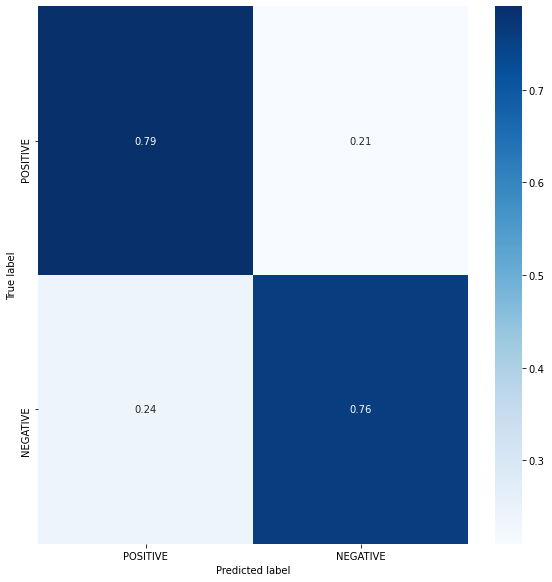

In [ ]:
y_pred=model1.predict(x_test_seq)
y_pred=[1 if x>=0.5 else 0 for x in y_pred]
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = ['POSITIVE','NEGATIVE'],
                     columns = ['POSITIVE','NEGATIVE'])
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## LSTM Model for Sentiment Analysis

In [22]:
lstm_input = Input(shape=(words_limit,))
embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=words_limit)(lstm_input)
simple_lstm = LSTM(128)(embedding)
dropout = Dropout(0.4)(simple_lstm)
dense = Dense(1)(dropout)
activation = Activation('sigmoid')(dense)
model2 = Model(lstm_input, activation)

In [23]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

Optimizer: Adam and Loss Model: Binary CrossEntropy

In [24]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(x_train_seq, y_train, batch_size=64, epochs=5, validation_split=0.2)

## Loss Score and Accuracy

In [ ]:
score, acc = model2.evaluate(x_test_seq, y_test, batch_size=32, verbose=0)
print("Loss Score: ",score)
print("Accuracy: ",acc)

Loss Score:  0.3427815262966521
Accuracy:  0.8494961


## Confusion Matrix

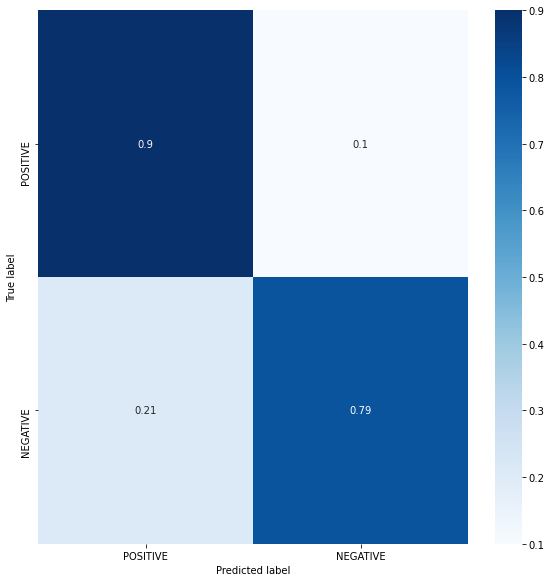

In [ ]:
y_pred=model2.predict(x_test_seq)
y_pred=[1 if x>=0.5 else 0 for x in y_pred]
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = ['POSITIVE','NEGATIVE'],
                     columns = ['POSITIVE','NEGATIVE'])
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## GRU Model for Sentiment Analysis

In [25]:
gru_input = Input(shape=(words_limit,))
embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=words_limit)(gru_input)
gru = GRU(128)(embedding)
dropout = Dropout(0.4)(gru)
dense = Dense(1)(dropout)
activation = Activation('sigmoid')(dense)
model3 = Model(gru_input, activation)

In [54]:
model3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 128)          11339136  
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 11,438,337
Trainable params: 11,438,337
Non-trainable params: 0
_______________________________________________

Optimizer: Adam and Loss Model: Binary CrossEntropy

In [56]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(x_train_seq, y_train, batch_size=32, epochs=10, validation_data=(x_test_seq, y_test),callbacks=[cp_callback])

Train on 181331 samples, validate on 42371 samples
Epoch 1/10
181312/181331 [============================>.] - ETA: 0s - loss: 0.3761 - accuracy: 0.8297
Epoch 00001: val_loss improved from inf to 0.30686, saving model to gru_model.h5
181331/181331 [==============================] - 1863s 10ms/sample - loss: 0.3761 - accuracy: 0.8297 - val_loss: 0.3069 - val_accuracy: 0.8670
Epoch 2/10
181312/181331 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.8707
Epoch 00002: val_loss did not improve from 0.30686
181331/181331 [==============================] - 3219s 18ms/sample - loss: 0.2996 - accuracy: 0.8707 - val_loss: 0.3145 - val_accuracy: 0.8614
Epoch 3/10
181312/181331 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.8882
Epoch 00003: val_loss did not improve from 0.30686
181331/181331 [==============================] - 2542s 14ms/sample - loss: 0.2612 - accuracy: 0.8882 - val_loss: 0.3971 - val_accuracy: 0.8482
Epoch 4/10
181312/181331 [=====

## Loss Score and Accuracy

In [ ]:
score, acc = model3.evaluate(x_test_seq, y_test, batch_size=32, verbose=0)
print("Loss Score: ",score)
print("Accuracy: ",acc)

Loss Score:  0.3427815262966521
Accuracy:  0.8494961


## Confusion Matrix

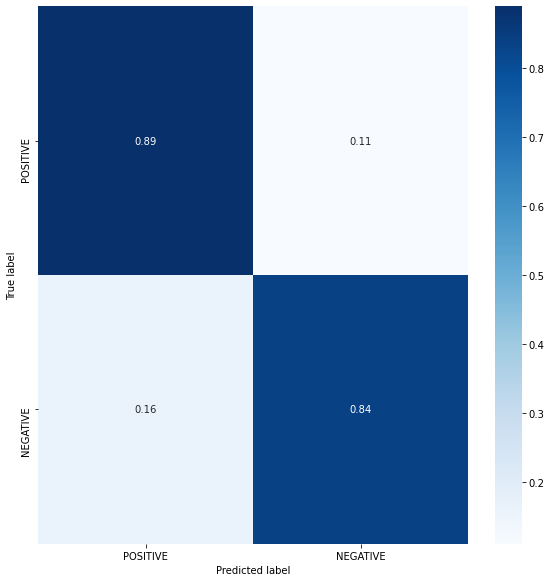

In [ ]:
y_pred=model3.predict(x_test_seq)
y_pred=[1 if x>=0.5 else 0 for x in y_pred]
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = ['POSITIVE','NEGATIVE'],
                     columns = ['POSITIVE','NEGATIVE'])
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()